In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import locale
import geopandas as gpd

In [69]:
df = pd.read_excel('covidData.xlsx')

In [70]:
df.head()

,State,Cases,Deaths
0,São Paulo,6614068,180267
1,Rio de Janeiro,2807886,77222
2,Minas Gerais,4209719,65729
3,Paraná,2941561,46353
4,Rio Grande do Sul,3041975,42256


In [71]:
df.shape

(27, 3)

In [72]:
df.columns

Index(['State', 'Cases', 'Deaths'], dtype='object')

In [73]:
df.describe()

,Cases,Deaths
count,2.700000e+01,27.000000
mean,1.392639e+06,26032.703704
std,1.473732e+06,36111.704452
min,1.636330e+05,2058.000000
25%,4.583255e+05,7906.000000
50%,8.806140e+05,14479.000000
75%,1.867063e+06,28194.500000
max,6.614068e+06,180267.000000


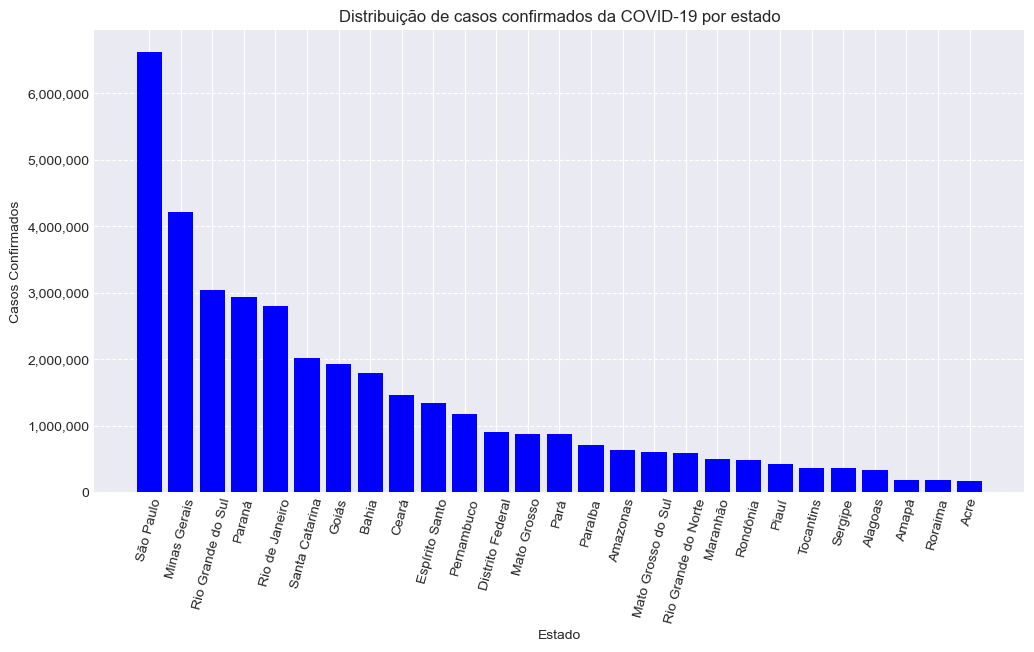

In [75]:
df_sorted = df.sort_values('Cases', ascending=False)
plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['State'], df_sorted['Cases'], color='blue')
plt.xlabel('Estado')
plt.ylabel('Casos Confirmados')
plt.title('Distribuição de casos confirmados da COVID-19 por estado')
plt.xticks(rotation=75)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y', linestyle='--')
plt.show()

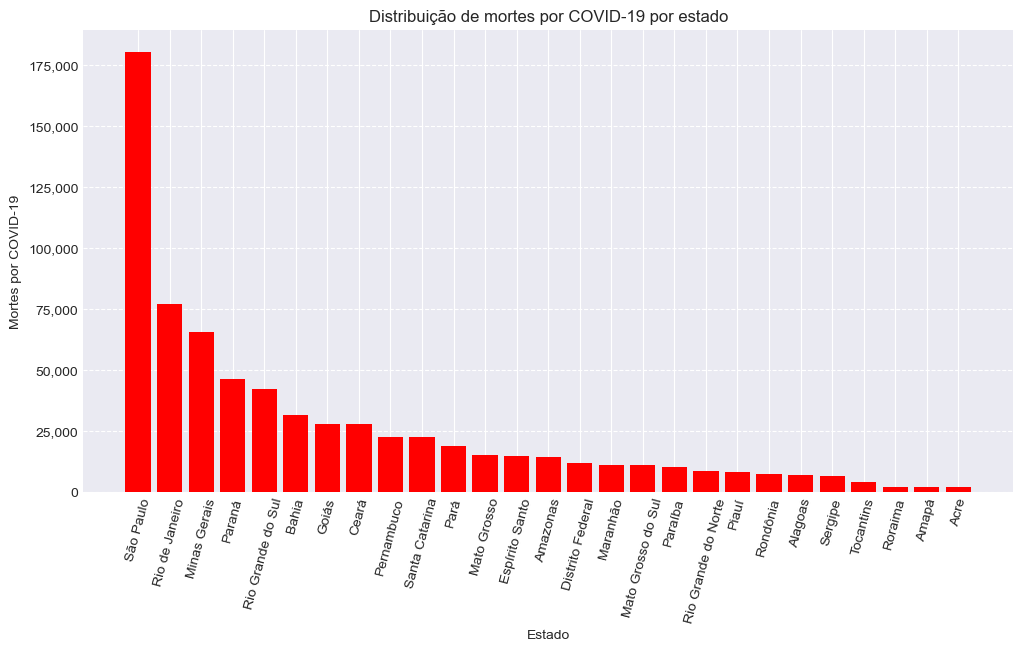

In [76]:
df_sorted = df.sort_values('Deaths', ascending=False)
plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['State'], df_sorted['Deaths'], color='red')
plt.xlabel('Estado')
plt.ylabel('Mortes por COVID-19')
plt.title('Distribuição de mortes por COVID-19 por estado')
plt.xticks(rotation=75)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y', linestyle='--')
plt.show()

In [78]:
df['Letality Rate'] = (df['Deaths'] / df['Cases']) * 100
df['Letality Rate'] = df['Letality Rate'].round(2)
df_top_5 = df.nlargest(5, 'Letality Rate')[['State', 'Letality Rate']].copy()
df_top_5 = df_top_5.rename(columns={'Letality Rate': 'Letality Rate'})
print(df_top_5.to_string(index=False))

         State  Letality Rate
Rio de Janeiro           2.75
     São Paulo           2.73
      Amazonas           2.27
      Maranhão           2.23
          Pará           2.17


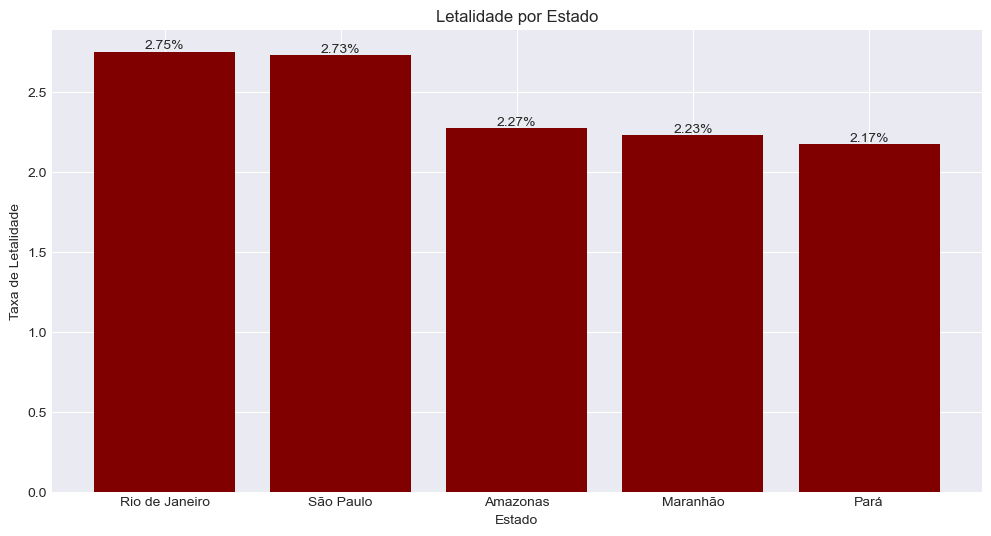

In [79]:
estados = df_top_5['State'].tolist()
letalidade = df_top_5['Letality Rate'].tolist()

plt.figure(figsize=(12, 6))

plt.bar(estados, letalidade, color='maroon')

plt.xlabel('Estado')
plt.ylabel('Taxa de Letalidade')
plt.title('Letalidade por Estado')

for i in range(len(estados)):
    plt.text(i, letalidade[i], f'{letalidade[i]}%', ha='center', va='bottom')

plt.show()

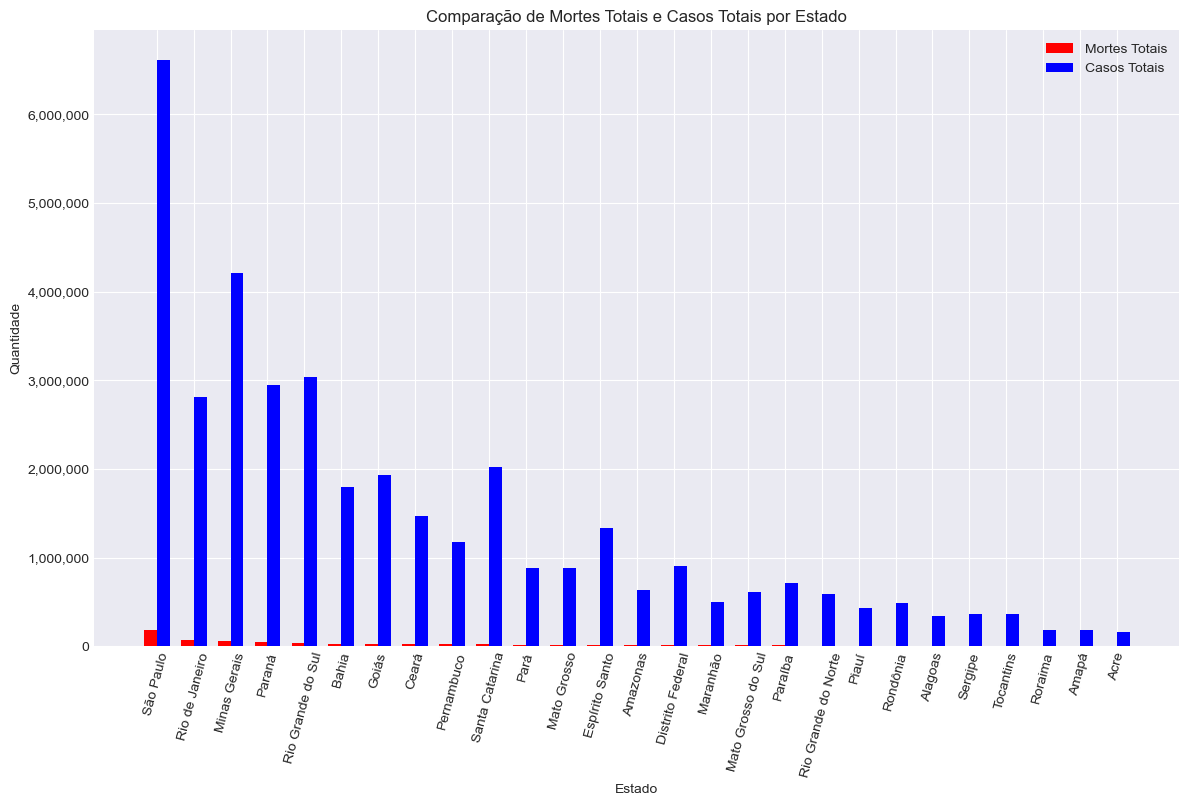

In [80]:
estados = df['State']
mortes_totais = df['Deaths']
casos_totais = df['Cases']
posicoes = range(len(estados))
largura_barras = 0.35
plt.figure(figsize=(14, 8))
plt.bar(posicoes, mortes_totais, width=largura_barras, label='Mortes Totais', color='red')
plt.bar([p + largura_barras for p in posicoes], casos_totais, width=largura_barras, label='Casos Totais', color='blue')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.title('Comparação de Mortes Totais e Casos Totais por Estado')
plt.xticks([p + largura_barras/2 for p in posicoes], estados)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=75)
plt.legend()
plt.show()

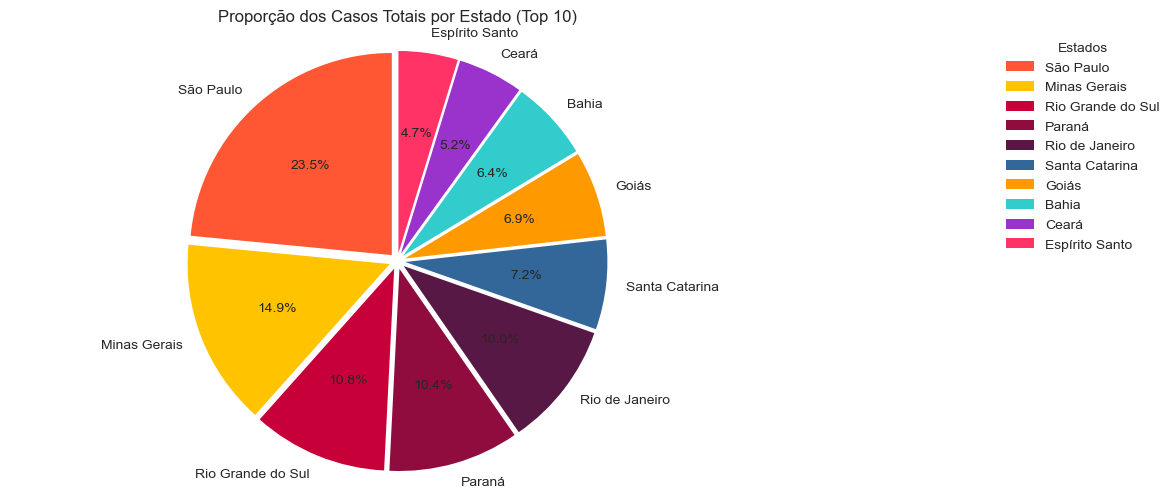

In [81]:
top_10_estados_casos = df.nlargest(10, 'Cases')
casos_top_10 = top_10_estados_casos['Cases']
estados_top_10_casos = top_10_estados_casos['State']

cores_personalizadas_casos = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845', '#336699', '#FF9900', '#33CCCC', '#9933CC', '#FF3366']
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(10, 6))
explode_casos = [0.04] * len(casos_top_10)

ax.pie(casos_top_10, labels=estados_top_10_casos, explode=explode_casos, colors=cores_personalizadas_casos, autopct='%1.1f%%', startangle=90)

ax.legend(title='Estados', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Proporção dos Casos Totais por Estado (Top 10)')
ax.axis('equal')

plt.show()

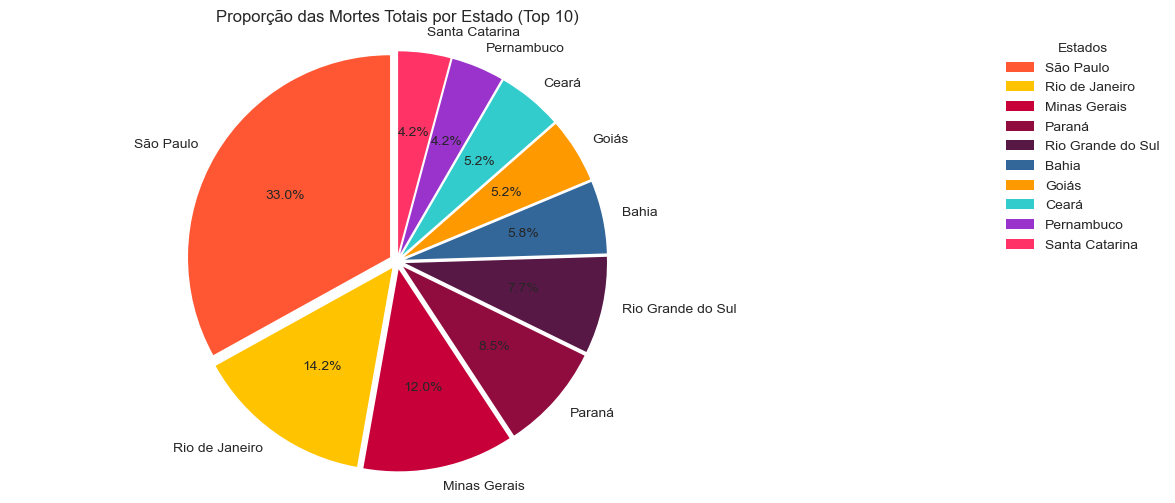

In [82]:
top_10_estados_mortes = df.nlargest(10, 'Deaths')

mortes_top_10 = top_10_estados_mortes['Deaths']
estados_top_10_mortes = top_10_estados_mortes['State']

cores_personalizadas_mortes = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845', '#336699', '#FF9900', '#33CCCC', '#9933CC', '#FF3366']

plt.style.use('seaborn-v0_8-white')

fig, ax = plt.subplots(figsize=(10, 6))
explode_mortes = [0.04] * len(mortes_top_10)

ax.pie(mortes_top_10, labels=estados_top_10_mortes, explode=explode_mortes, colors=cores_personalizadas_mortes, autopct='%1.1f%%', startangle=90)
ax.legend(title='Estados', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Proporção das Mortes Totais por Estado (Top 10)')
ax.axis('equal')
plt.show()

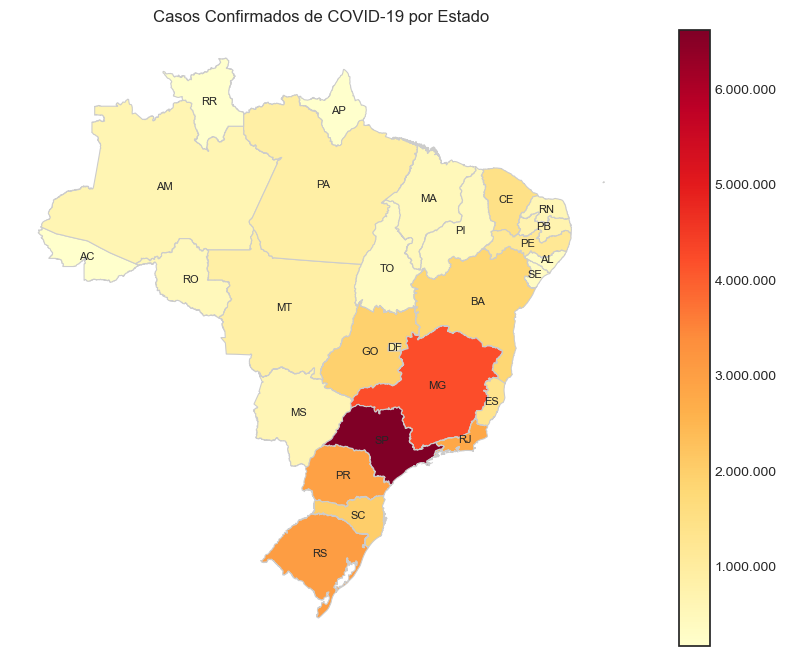

In [83]:
locale.setlocale(locale.LC_ALL, '')
mapa = gpd.read_file(r"C:\Users\isabe\Downloads\ESTADOS\estados.shp")
mapa = mapa.merge(df, left_on='nome', right_on='State')
mapa = mapa.to_crs('EPSG:3857')
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_aspect('equal')
formatter = ticker.FuncFormatter(lambda x, pos: locale.format_string("%d", x, grouping=True))
mapa.plot(column='Cases', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'format': formatter})
mapa['centroid'] = mapa.centroid
for x, y, sigla in zip(mapa['centroid'].x, mapa['centroid'].y, mapa['sigla']):
    ax.text(x, y, sigla, fontsize=8, ha='center', va='center')
ax.set_title('Casos Confirmados de COVID-19 por Estado')
ax.axis('off')
plt.show()